#### Object Detection 
1. Object Detection 
    * Object Detection 객체 탐지, 객체 검출
    * Object Detection은 입력 이미지로부터 여러 개의 객체를 찾아내고 객체가 무엇인지 분류하는 두가지 작업을 동시에 처리한다. 
    * 이미지에서 각 객체의 위치를 찾아내고, 객체를 둘러싸는 box를 그린다. 
    * 객체의 경계를 나타내는 좌표값을 회귀 문제로 접근한 후 위치를 찾아내는 각 객체가 어떤 클래스에 속하는지 분류한다. 

In [2]:
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import tensorflow_hub as tfhub
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import get_file

In [5]:
from google.colab import drive

In [6]:
drive.mount("/content/MyDrive/")

Mounted at /content/MyDrive/


In [7]:
FILE_PATH = "MyDrive/MyDrive/dataset/yolo/gangnam.jpg"

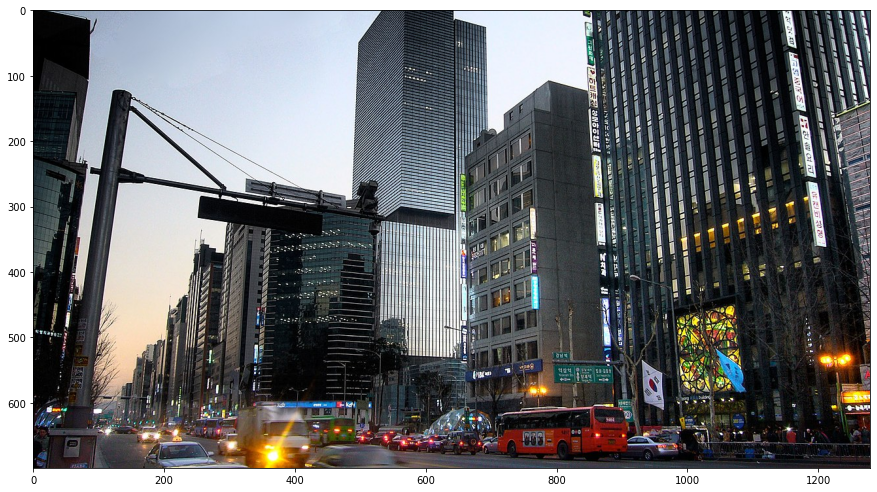

In [8]:
img = cv2.cvtColor(cv2.imread(FILE_PATH), cv2.COLOR_BGR2RGB)

def get_show_images(image):
    plt.figure(figsize=(15, 10))
    plt.imshow(image)
    plt.axis("on")


get_show_images(img)

352256/336122 [===============================] - 0s 0us/step


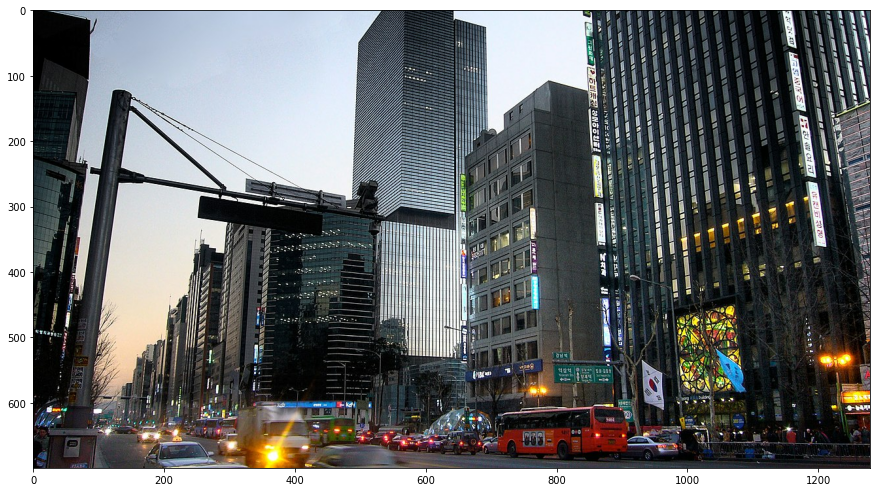

In [9]:
img_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg'
img2 = tf.keras.utils.get_file(fname='gangnam', origin=img_path)
img2 = tf.io.read_file(img2)   
img2 = tf.image.decode_jpeg(img2, channels=3) 
img2 = tf.image.convert_image_dtype(img2, tf.float32)

get_show_images(img2)

In [10]:
print(img2.shape)
img_input = tf.expand_dims(img2, 0)
print(img_input.shape)


(700, 1280, 3)
(1, 700, 1280, 3)


In [11]:
model = tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [12]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7FCB1B8DA990>}))

In [13]:
obj_detector = model.signatures["default"]
obj_detector

<ConcreteFunction pruned(images) at 0x7FCB1B8DA990>

In [14]:
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_scores', 'detection_boxes', 'detection_class_entities', 'detection_class_names', 'detection_class_labels'])

In [15]:
len(result["detection_scores"])

100

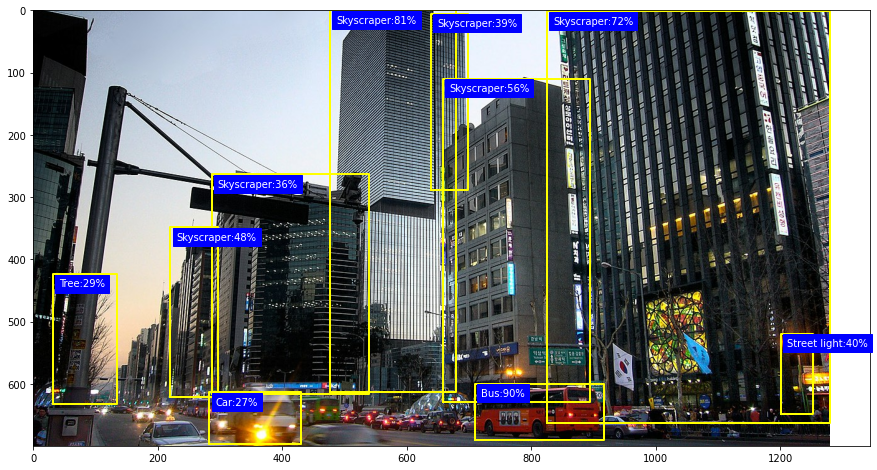

In [22]:
boxes = result["detection_boxes"]
labels = result["detection_class_entities"]
scores = result["detection_scores"]

img_height, img_width = img.shape[0], img.shape[1]

obj_to_detect = 10

plt.figure(figsize=(15, 10))

for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width, 
                                    boxes[i][2]*img_height, boxes[i][3]*img_width)
        plt.imshow(img2)
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin,ymin,ymax,ymax,ymin], color = "yellow",linewidth=2)

        class_name = labels[i].numpy().decode("utf-8")
        infer_score = int(scores[i].numpy()*100)
        annotation = "{}:{}%".format(class_name, infer_score)
        plt.text(xmin+10, ymax+20, annotation, color="white", backgroundcolor="blue",fontsize=10)
